# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

### Importing BBC webscrapping

In [ ]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',200)
df_bbc_china = bbc.keyword('China',200)

### Importing CNN webscrapping

In [ ]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [ ]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [ ]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [2]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [3]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [4]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
37,Shanghai schools to go online as Covid spreads...,Shanghai schools to go online as Covid spreads...,https://www.bbc.co.uk/news/world-asia-64010209,17,12,2022,"[covid, shanghai, schools, china, online, coun...",0.345566,0.08303,17/12/2022,bbc,china


- Russia

In [5]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
23,Russia's economy shrinks by less than expected...,Russia´s economy shrinks by less than expected...,https://www.bbc.co.uk/news/business-64708832,20,2,2023,"[russia, economy, oil, western, ukraine, expor...",0.262138,0.017751,20/2/2023,bbc,russia


### Applying to CNN

- China

In [6]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
130,China approved equivalent of two new coal plan...,China approved equivalent of two new coal pla...,https://www.cnn.com/2023/02/27/energy/china-ne...,27,2,2023,"[coal, china, power, report, carbon, jones, pl...",0.321763,0.089107,27/2/2023,cnn,china


- Russia

In [7]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
27,Georgia protests over foreign agents bill cont...,Georgia protests over foreign agents bill con...,https://www.cnn.com/2023/03/08/europe/georgia-...,8,3,2023,"[georgia, bill, georgian, european, europe, fo...",0.336992,0.087958,8/3/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [8]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
67,Interview: China women's basketball coach aims...,Interview: China women´s basketball coach aims...,http://english.people.com.cn/n3/2023/0309/c900...,9,3,2023,"[zheng, team, china, cup, players, final, wome...",0.414745,0.17011,9/3/2023,pdo,usa


- United Kingdom

In [9]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
42,Foreign CEOs upbeat on China's market - People...,Foreign CEOs upbeat on China´s marketBy LIU ZH...,http://english.people.com.cn/n3/2023/0214/c900...,14,2,2023,"[china, economic, visit, country, growth, fore...",0.291824,0.070362,14/2/2023,pdo,uk


### Applying to RT

- United States of America

In [10]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
79,US Congress greenlights Covid origins report —...,US Congress greenlights Covid origins ...,https://www.rt.com/news/572788-congress-passes...,2023,3,11,"[covid, house, bill, intelligence, lab, origin...",0.329031,0.060674,11/3/2023,rt,usa


- United Kingdom

In [11]:
df_rt_uk = nk.preprocess(df_rt_uk)

df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
131,Biggest European clothing polluters in Kenya r...,HomeAfrica Biggest European clothing po...,https://www.rt.com/news/571869-used-clothes-po...,2023,2,21,"[kenya, clothing, waste, million, report, item...",0.273161,0.044655,21/2/2023,rt,uk


### Saving all the DF's in one for visualisation

In [21]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_words = nk.list_words(df_together)


### wordcloud

In [24]:
import src.wordcloud as wc

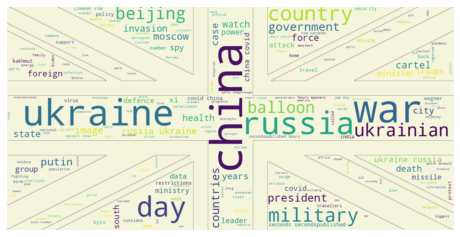

In [25]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

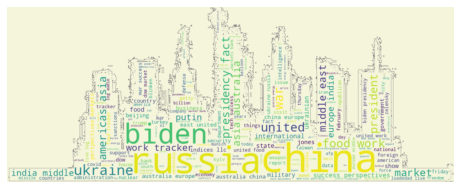

In [28]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

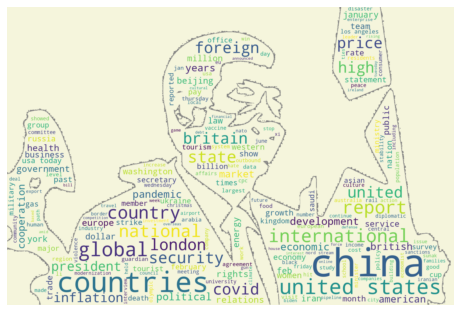

In [29]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

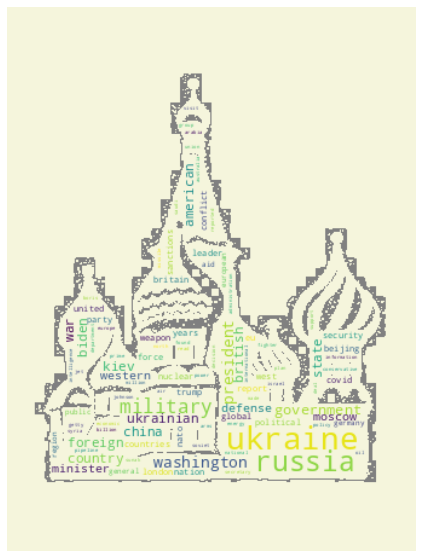

In [30]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

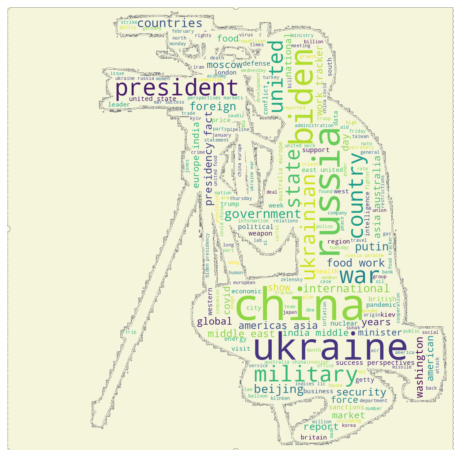

In [31]:
wc.wordcloud(df_together,'press.png')

In [32]:
df_bbc_words=nk.list_words(df_bbc)
df_cnn_words= nk.list_words(df_cnn)
df_pd_words= nk.list_words(df_pd)
df_rt_words= nk.list_words(df_rt)

In [33]:
df_together.to_csv('data/dfcomplete.csv',index=False)
df_words.to_csv ('data/words.csv',index=False)
df_bbc_words.to_csv('data/bbc_words.csv',index=False)
df_cnn_words_china.to_csv('data/cnn_words.csv',index=False)
df_pd_words.to_csv('data/pd_words.csv',index=False)
df_rt_words.to_csv('data/rt_words.csv',index=False)